<a href="https://colab.research.google.com/github/dapsavoie/agricultural_satellite_classifier/blob/master/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd 
import keras 

from keras.models import load_model 
from keras.preprocessing.image import ImageDataGenerator

from sklearn import metrics

from IPython.display import Image, display, SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model

In [0]:
val_df = pd.read_csv(r'/content/drive/My Drive/agri_vision/Agriculture-Vision/val_encoded.csv')
val_df.drop(columns='Unnamed: 0', inplace=True)
#strip train index
val_df['index'] = val_df['index'].str.rstrip('.png')
val_df['index'] = val_df['index'] + '.jpg'
columns = ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_dataframe(
    dataframe = val_df, 
    directory = '/content/drive/My Drive/agri_vision/Agriculture-Vision/val/rgb',
    x_col = "index",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(256, 256),
)

Found 4431 validated image filenames.


# Model 1 
- Adam optimizer 
- Batch size: 32
- Epochs: 10

In [0]:
model_1 = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/72%_.88_loss_binary_sequential.h5')

In [0]:
preds = model_1.predict(test_generator)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2405 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [0]:
y_val_true = val_df.drop(columns='index').values.argmax(axis=1)
y_val_pred = preds.argmax(axis=1)

In [0]:
metrics.accuracy_score(y_val_true, y_val_pred)

0.7066125028210336

In [0]:
target_names =  ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

from sklearn.metrics import classification_report
print(classification_report(y_val_true, y_val_pred, target_names=target_names))

                precision    recall  f1-score   support

  cloud_shadow       0.51      0.69      0.59       209
double_planter       0.53      0.62      0.57       440
  planter_skip       0.00      0.00      0.00        23
standing_water       0.55      0.30      0.39       289
      waterway       0.45      0.45      0.45       511
  weed_cluster       0.81      0.81      0.81      2959

      accuracy                           0.71      4431
     macro avg       0.47      0.48      0.47      4431
  weighted avg       0.70      0.71      0.70      4431



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


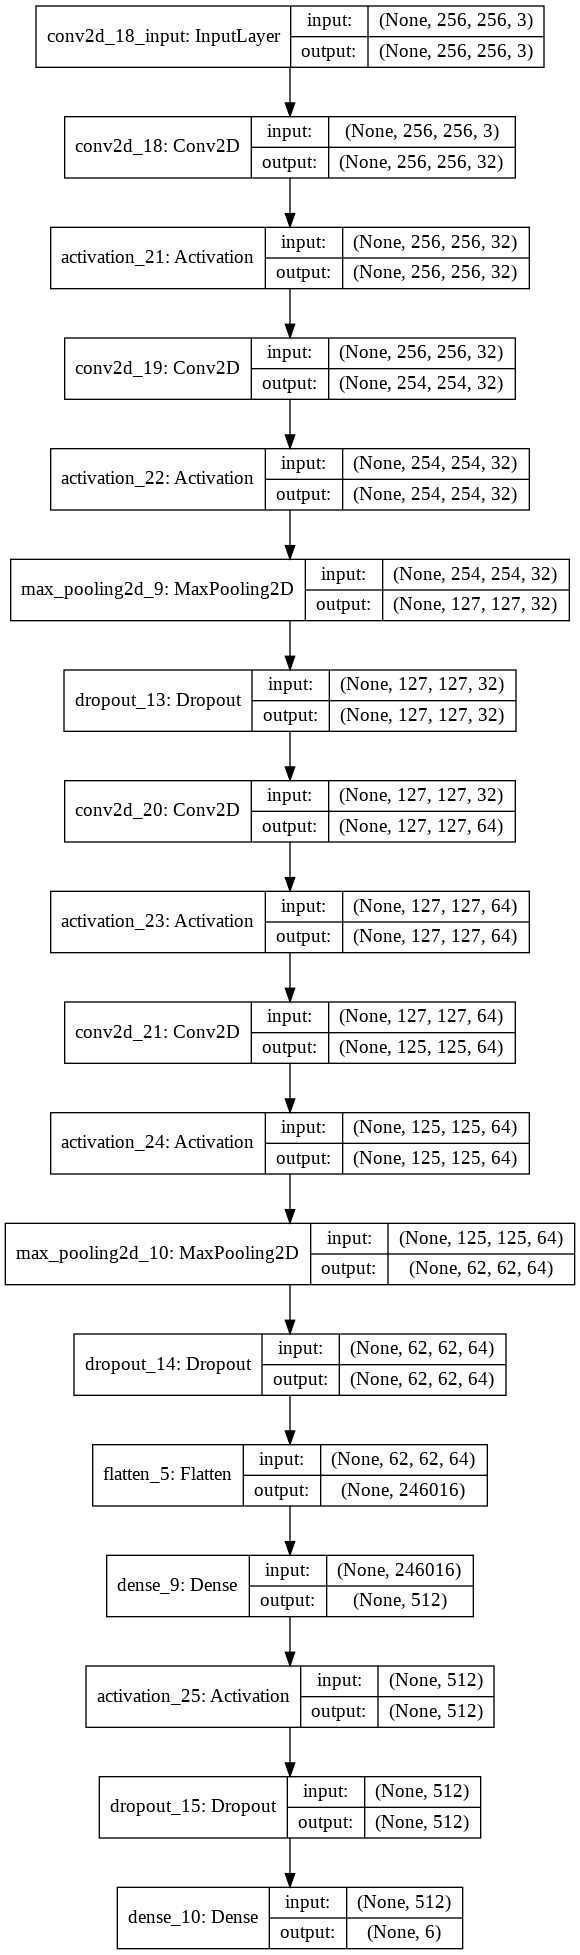

In [0]:
plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model 2 
- Adam Optimizer 
- Batch Size: 32
- Epochs 20

In [0]:
model_2 = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/adam_78.h5')

In [0]:
preds = model_2.predict(test_generator)

In [0]:
y_val_true = val_df.drop(columns='index').values.argmax(axis=1)
y_val_pred = preds.argmax(axis=1)

In [0]:
metrics.accuracy_score(y_val_true, y_val_pred)

0.7605506657639359

In [0]:
target_names =  ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

from sklearn.metrics import classification_report
print(classification_report(y_val_true, y_val_pred, target_names=target_names))

                precision    recall  f1-score   support

  cloud_shadow       0.62      0.70      0.66       209
double_planter       0.70      0.57      0.63       440
  planter_skip       0.00      0.00      0.00        23
standing_water       0.70      0.43      0.53       289
      waterway       0.56      0.35      0.43       511
  weed_cluster       0.80      0.90      0.85      2959

      accuracy                           0.76      4431
     macro avg       0.56      0.49      0.52      4431
  weighted avg       0.74      0.76      0.74      4431



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


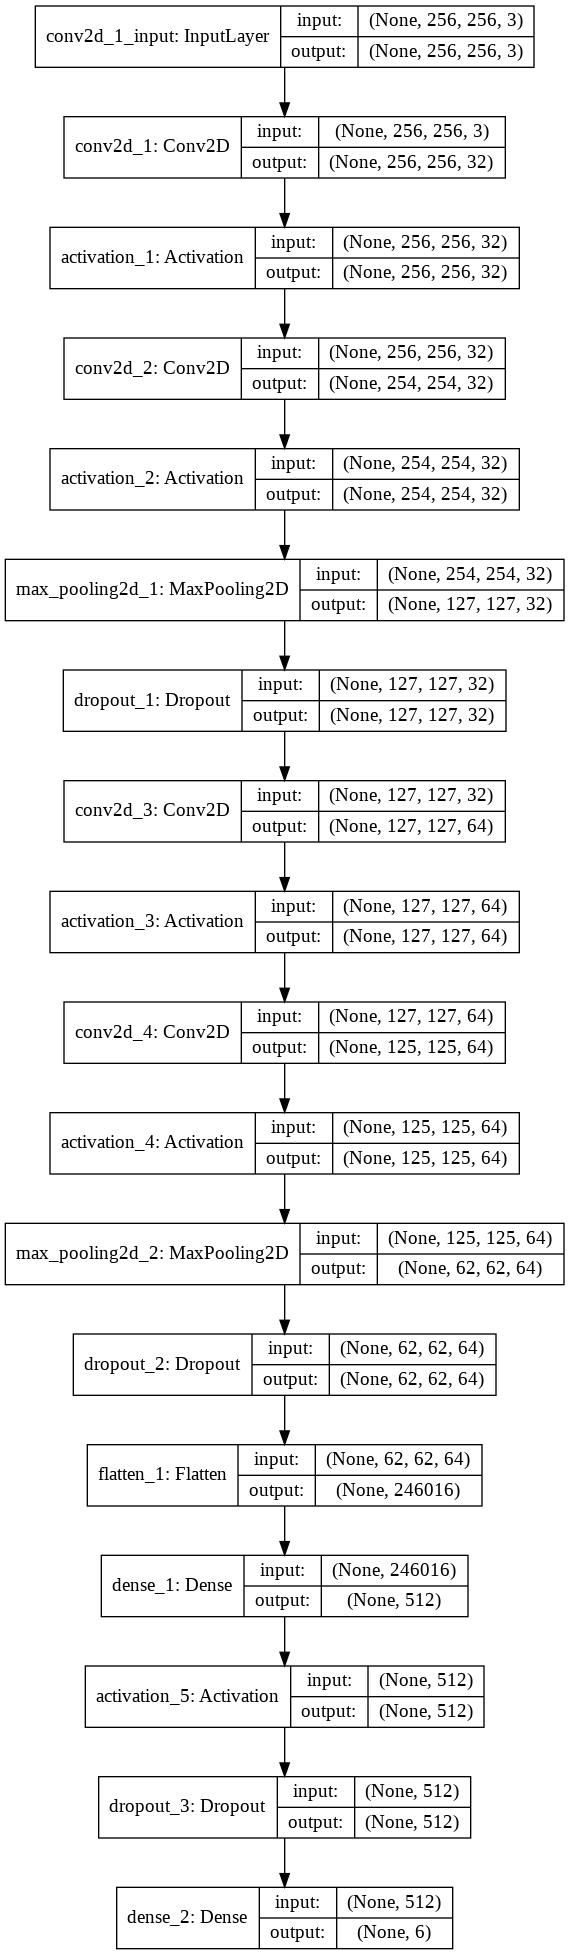

In [0]:
plot_model(model_2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model 3
- rmsprop optimiser 
- Batch size: 32
- 18 epochs

In [0]:
model_3 = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/rmsprop.h5')

In [0]:
preds = model_3.predict(test_generator)

In [0]:
y_val_true = val_df.drop(columns='index').values.argmax(axis=1)
y_val_pred = preds.argmax(axis=1)

In [0]:
metrics.accuracy_score(y_val_true, y_val_pred)

0.7336944256375536

In [0]:
target_names =  ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

from sklearn.metrics import classification_report
print(classification_report(y_val_true, y_val_pred, target_names=target_names))

                precision    recall  f1-score   support

  cloud_shadow       0.66      0.36      0.47       209
double_planter       0.63      0.42      0.50       440
  planter_skip       0.00      0.00      0.00        23
standing_water       0.64      0.26      0.37       289
      waterway       0.61      0.29      0.39       511
  weed_cluster       0.76      0.93      0.84      2959

      accuracy                           0.73      4431
     macro avg       0.55      0.38      0.43      4431
  weighted avg       0.71      0.73      0.70      4431



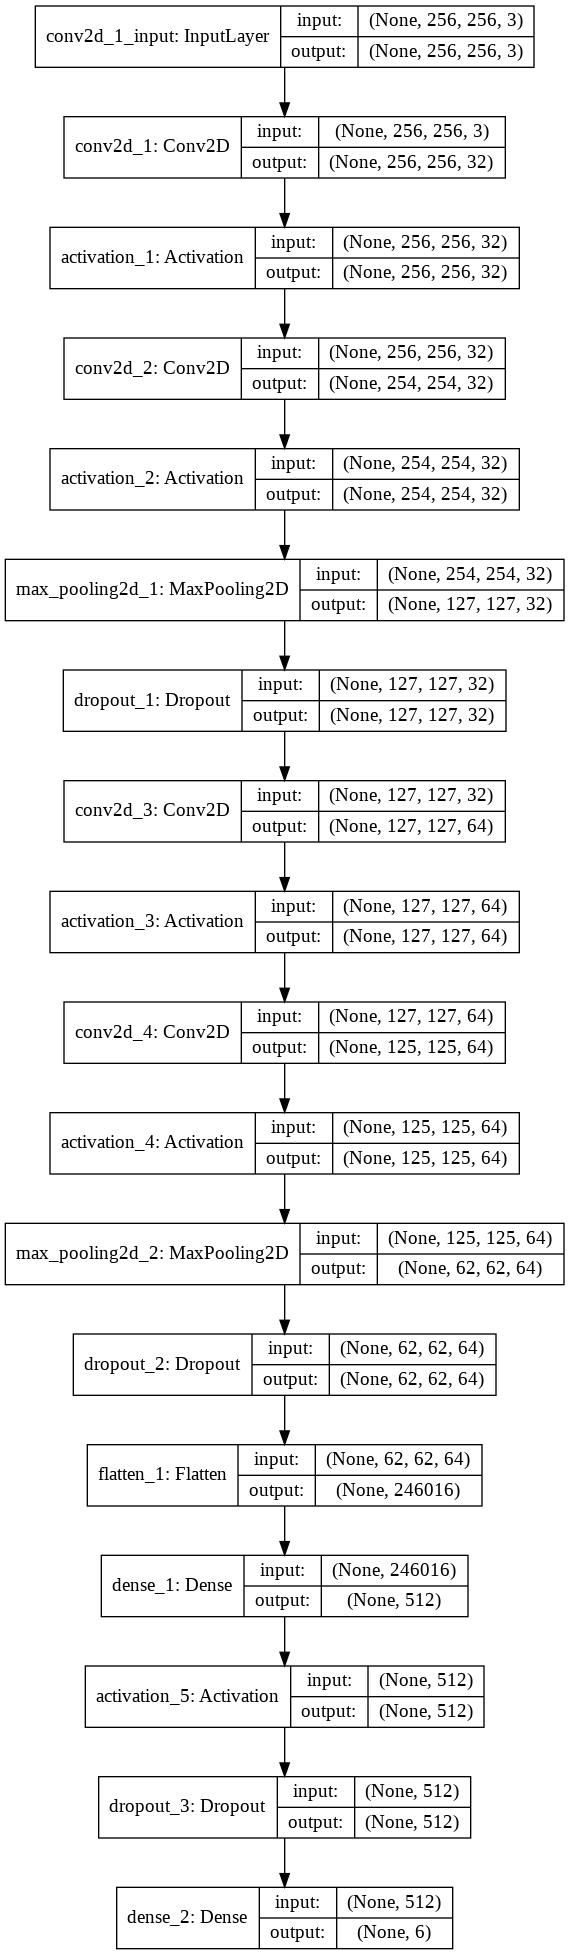

In [0]:
plot_model(model_3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model 4 
- adam optimizer
- batch size: 32
- 2 epochs
- Issue with exploding gradient 


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_dataframe(
    dataframe = val_df, 
    directory = '/content/drive/My Drive/agri_vision/Agriculture-Vision/val/rgb',
    x_col = "index",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(512,512),
)

Found 4431 validated image filenames.


In [0]:
model_4 = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/cnn1.h5')

In [0]:
preds = model_4.predict(test_generator)

In [0]:
y_val_true = val_df.drop(columns='index').values.argmax(axis=1)
y_val_pred = preds.argmax(axis=1)

In [15]:
metrics.accuracy_score(y_val_true, y_val_pred)

0.6574136763710223

In [16]:
target_names =  ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']

from sklearn.metrics import classification_report
print(classification_report(y_val_true, y_val_pred, target_names=target_names))

                precision    recall  f1-score   support

  cloud_shadow       0.00      0.00      0.00       209
double_planter       0.00      0.00      0.00       440
  planter_skip       0.00      0.00      0.00        23
standing_water       0.00      0.00      0.00       289
      waterway       0.15      0.04      0.06       511
  weed_cluster       0.67      0.98      0.80      2959

      accuracy                           0.66      4431
     macro avg       0.14      0.17      0.14      4431
  weighted avg       0.47      0.66      0.54      4431



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


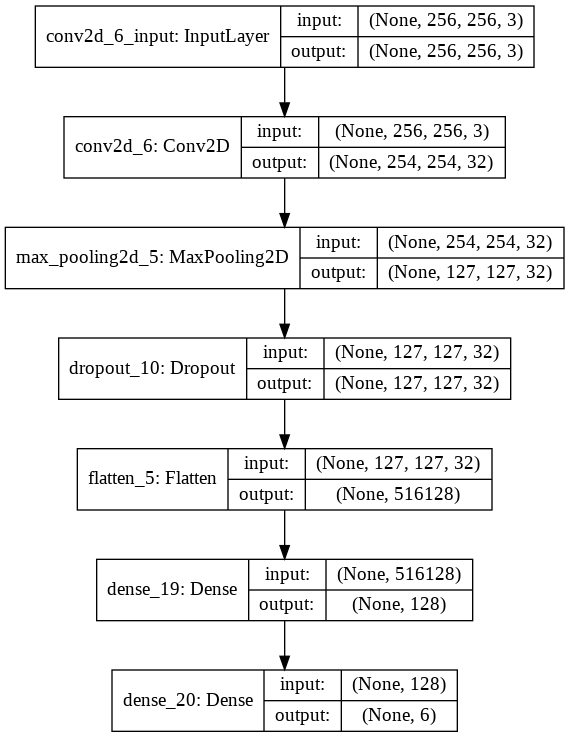

In [19]:
plot_model(model_4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)